<a href="https://colab.research.google.com/github/JanineFreitas/OuroBranco/blob/master/PROJETO_OURO_BRANCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Autenticação com Google Drive
from google.colab import drive

# This will prompt de Autorização.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
#from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import iqr

from sklearn import decomposition
#from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb

# Visual libraries
import plotly.graph_objs as go
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from plotly.offline import iplot

# Main libraries
from scipy import stats

from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import time
from math import sqrt
from math import log2

In [ ]:
#Importar base de dados
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/TABELA.csv', delimiter=",", header=0)

# Entendimento dos Dados

##Tratamento dos dados

In [ ]:
#Transformar DD/MM/YYYY em YYYY/MM/DD e inteiro
df['DATA_ADMISSAO'] = df['DATA_ADMISSAO'].apply(lambda x: int(str(x).split("/")[2]+str(x).split("/")[1]+str(x).split("/")[0]) )

In [ ]:
#Se a VERBA_0997 está diferente da soma de todas os descontos, adicionar o valor na coluna VERBA_DESCONTO_FALTANTE
df['VERBA_DESCONTO_FALTANTE'] = 0
for dataset in [df]:
  dataset.loc[dataset.VERBA_0997 > 
              (dataset.VERBA_0606 + dataset.VERBA_0713 + dataset.VERBA_0682 + dataset.VERBA_0697 + dataset.VERBA_0699 + dataset.VERBA_0698 + dataset.VERBA_0607 + dataset.VERBA_0631 + dataset.VERBA_0983 + dataset.VERBA_0980), 'VERBA_DESCONTO_FALTANTE'] = round(dataset.VERBA_0997 - (dataset.VERBA_0606 + dataset.VERBA_0713 + dataset.VERBA_0682 + dataset.VERBA_0697 + dataset.VERBA_0699 + dataset.VERBA_0698 + dataset.VERBA_0607 + dataset.VERBA_0631 + dataset.VERBA_0983 + dataset.VERBA_0980), 2)

In [ ]:
#Se a VERBA_0996 está diferente da soma de todas os provetos, adicionar o valor na coluna VERBA_PROVENTO_FALTANTE
df['VERBA_PROVENTO_FALTANTE'] = 0
for dataset in [df]:
  dataset.loc[dataset.VERBA_0996 > (dataset.VERBA_0308 +   dataset.VERBA_0163  +   dataset.VERBA_0122  +   dataset.VERBA_0230  +   dataset.VERBA_0001  +   dataset.VERBA_0099  +   dataset.VERBA_0318  + 
    dataset.VERBA_0180  +   dataset.VERBA_0005  +   dataset.VERBA_0190  +   dataset.VERBA_0097  +   dataset.VERBA_0170  +   dataset.VERBA_0326  +   dataset.VERBA_0058  +   dataset.VERBA_0219  + 
    dataset.VERBA_0133  +   dataset.VERBA_0096  +   dataset.VERBA_0159  +   dataset.VERBA_0009  +   dataset.VERBA_0174  +   dataset.VERBA_0165  +   dataset.VERBA_0100  +   dataset.VERBA_0107  + 
    dataset.VERBA_0004  +   dataset.VERBA_0381  +   dataset.VERBA_0183  +   dataset.VERBA_0271  +   dataset.VERBA_0231  +   dataset.VERBA_0008  +   dataset.VERBA_0207  +   dataset.VERBA_0171  + 
    dataset.VERBA_0007  +   dataset.VERBA_0138  +   dataset.VERBA_0111  +   dataset.VERBA_0085  +   dataset.VERBA_0116  +   dataset.VERBA_0152  +   dataset.VERBA_0382  +   dataset.VERBA_0093 ), 'VERBA_PROVENTO_FALTANTE'] = round(dataset.VERBA_0996 - (dataset.VERBA_0308 +   dataset.VERBA_0163  +   dataset.VERBA_0122  +   dataset.VERBA_0230  +   dataset.VERBA_0001  +   dataset.VERBA_0099  +   dataset.VERBA_0318  + 
    dataset.VERBA_0180  +   dataset.VERBA_0005  +   dataset.VERBA_0190  +   dataset.VERBA_0097  +   dataset.VERBA_0170  +   dataset.VERBA_0326  +   dataset.VERBA_0058  +   dataset.VERBA_0219  + 
    dataset.VERBA_0133  +   dataset.VERBA_0096  +   dataset.VERBA_0159  +   dataset.VERBA_0009  +   dataset.VERBA_0174  +   dataset.VERBA_0165  +   dataset.VERBA_0100  +   dataset.VERBA_0107  + 
    dataset.VERBA_0004  +   dataset.VERBA_0381  +   dataset.VERBA_0183  +   dataset.VERBA_0271  +   dataset.VERBA_0231  +   dataset.VERBA_0008  +   dataset.VERBA_0207  +   dataset.VERBA_0171  + 
    dataset.VERBA_0007  +   dataset.VERBA_0138  +   dataset.VERBA_0111  +   dataset.VERBA_0085  +   dataset.VERBA_0116  +   dataset.VERBA_0152  +   dataset.VERBA_0382  +   dataset.VERBA_0093), 4)

##Removendo Colunas

In [ ]:
#Removendo coluna ativo, porque todas estão como 'S'
df = df.drop('ATIVO', axis=1)

#Removendo coluna cep lotação porque todos os valores estão igual
df = df.drop('CEP_LOTACAO', axis=1)

#Removendo coluna data estração, porque não sinifica nada para o modelo apenas controle interno
df = df.drop('DATA_EXTRACAO', axis=1)

#Remover ID
df = df.drop('ID', axis=1)

##Tranformando string em float - Verbas

In [ ]:
#Transformar os dados que estão em string em float
df['VERBA_0606'] = df['VERBA_0606'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0308'] = df['VERBA_0308'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0163'] = df['VERBA_0163'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0713'] = df['VERBA_0713'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0122'] = df['VERBA_0122'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0682'] = df['VERBA_0682'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0230'] = df['VERBA_0230'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0001'] = df['VERBA_0001'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0099'] = df['VERBA_0099'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0318'] = df['VERBA_0318'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0180'] = df['VERBA_0180'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0697'] = df['VERBA_0697'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0005'] = df['VERBA_0005'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0190'] = df['VERBA_0190'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0097'] = df['VERBA_0097'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0170'] = df['VERBA_0170'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0326'] = df['VERBA_0326'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0058'] = df['VERBA_0058'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0219'] = df['VERBA_0219'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0133'] = df['VERBA_0133'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0096'] = df['VERBA_0096'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0159'] = df['VERBA_0159'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0699'] = df['VERBA_0699'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0009'] = df['VERBA_0009'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0174'] = df['VERBA_0174'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0165'] = df['VERBA_0165'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0100'] = df['VERBA_0100'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0107'] = df['VERBA_0107'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0698'] = df['VERBA_0698'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0998'] = df['VERBA_0998'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0004'] = df['VERBA_0004'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0980'] = df['VERBA_0980'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0381'] = df['VERBA_0381'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0183'] = df['VERBA_0183'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0997'] = df['VERBA_0997'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0607'] = df['VERBA_0607'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0271'] = df['VERBA_0271'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0231'] = df['VERBA_0231'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0008'] = df['VERBA_0008'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0996'] = df['VERBA_0996'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0207'] = df['VERBA_0207'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0171'] = df['VERBA_0171'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0631'] = df['VERBA_0631'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0007'] = df['VERBA_0007'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0138'] = df['VERBA_0138'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0111'] = df['VERBA_0111'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0085'] = df['VERBA_0085'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0116'] = df['VERBA_0116'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0983'] = df['VERBA_0983'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0152'] = df['VERBA_0152'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0382'] = df['VERBA_0382'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0093'] = df['VERBA_0093'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_0206'] = df['VERBA_0206'].apply(lambda x: float(str(x).replace(",",".")))
df['JORNADA_MENSAL'] = df['JORNADA_MENSAL'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_DESCONTO_FALTANTE'] = df['VERBA_DESCONTO_FALTANTE'].apply(lambda x: float(str(x).replace(",",".")))
df['VERBA_PROVENTO_FALTANTE'] = df['VERBA_PROVENTO_FALTANTE'].apply(lambda x: float(str(x).replace(",",".")))

#Transformar os dados que estão em string em int
df['CEP_RESIDENCIA'] = df['CEP_RESIDENCIA'].apply(lambda x: int(x))

##Removendo Valores

In [ ]:
#Remover todos os bolsisitas
listaRemovida = df.loc[df['PLANO'] == 'BOL'].index

for i in listaRemovida:
  df = df.drop(i, axis=0)

In [ ]:
#Remover funcionario com salario abaixo de R$ 2.000 - 278 linhas excluídas
listaRemovidaFuncionariosSalarioBaixo = df.loc[df['VERBA_0998'] < 1500].index

for i in listaRemovidaFuncionariosSalarioBaixo:
  df = df.drop(i, axis=0)

In [ ]:
#Remover secretário - fora do padrão
listaRemovida = df.loc[df['NIVEL'] == 'S'].index

for i in listaRemovida:
  df = df.drop(i, axis=0)

In [ ]:
#Remover diretor geral - não é o publico do estudo
listaRemovidaDG1 = df.loc[df['NIVEL'] == 'DG1'].index

for i in listaRemovidaDG1:
  df = df.drop(i, axis=0)

In [ ]:
#Removendo coluna VERBA_0058 pq só DG1 tem direito
df = df.drop('VERBA_0058', axis=1)

In [ ]:
#Tratamento de Grau de Intrução valor 'NAO INFORMADO' ->'ENSINO MÉDIO COMPLETO'
for dataset in [df]:
  dataset.loc[dataset.GRAUINSTRUCAO == 'NAO INFORMADO', 'GRAUINSTRUCAO'] = 'ENSINO MÉDIO COMPLETO'

In [ ]:
#Funcionario com salario igual a zero, foi porque tiveram 30 dias de faltas
funcionarioSalarioZero = df.loc[df['VERBA_0998'] == 0]
funcionarioSalarioZero.head(3)

#Remover Funcionarios sem salário
listaRemovidaFuncionarios = df.loc[df['VERBA_0998'] == 0].index

for i in listaRemovidaFuncionarios:
  df = df.drop(i, axis=0)

In [ ]:
#Funcionário que tem a VERBA_0093 assumiram lugar de cargo comissionado, isso acontece geralmente quando eles tiram ferias, ai a pessoa passa a receber pelo salario do cargo comissionado, essa exceção tbm não é o publico do meu trabalho
listaVerba93 = df.loc[df['VERBA_0093'] > 0].index

for i in listaVerba93:
  df = df.drop(i, axis=0)

In [ ]:
#Removendo a coluna pq não tem mais ninguem com verba VERBA_0093
df = df.drop('VERBA_0093', axis=1)

## Converter texto em números

### Hierarquia Importante

In [ ]:
#Mapeamento feito pela area de negocio do plano mais baixo para nível mais alto, ordem crescente
plano_mapping={#'BOL':1, 
               'NM1':1, 'NM2':2, 'NS2': 3, 'CCO':4, #'SEC':6
              }

for dataset in [df]:
  dataset['PLANO'] = dataset['PLANO'].map(plano_mapping)

plano_categoria = list(set(df['PLANO']))
plano_categoria

[1, 2, 3, 4]

In [ ]:
#Mapeamento feito pela area de negocio do nível mais baixo para nível mais alto, ordem crescente
#AN3, ANM, DAS, DNS, DG1 - Não pode ser classificado por ordem crescente
nilvel_mapping={#'ANM':1, 'AN3':2,
                'B2':1, 'B2E': 2, 'B4':3, 'C1':4, 'C2':5, 'C3':6, 'C4':7, 'DAS': 8, 'DNS':9, 'D4':10, 'DG1':11 ,#'S':14
                }

for dataset in [df]:
  dataset['NIVEL'] = dataset['NIVEL'].map(nilvel_mapping)

plano_nivel = list(set(df['NIVEL']))
plano_nivel

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
#Tratando Grau de Instrução -> 'NAO INFORMADO': 0 agora é 4
instrucao_mapping={ #'NAO INFORMADO': 4,
                   #'ENSINO MÉDIO INCOMPLETO': 3,
                    'ANALFABETO. INCLUSIVE O QUE. EMBORA TENHA RECEBIDO INSTRUÇÃO. NÃO SE ALFABETIZOU':1, 
                   'ENSINO FUNDAMENTAL COMPLETO':2,  
                   'ENSINO MÉDIO COMPLETO':3, 
                   'ENSINO MÉDIO PROFISSIONALIZANTE COMPLETO':4, 
                   'EDUCAÇÃO SUPERIOR INCOMPLETA':5, 
                   'EDUCAÇÃO SUPERIOR COMPLETA':6,
                   'PÓS-GRADUAÇÃO COMPLETA':7
                   }

for dataset in [df]:
  dataset['GRAUINSTRUCAO'] = dataset['GRAUINSTRUCAO'].map(instrucao_mapping)

tipo_instrucao = list(set(df['GRAUINSTRUCAO']))
tipo_instrucao

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
#Mapeamento das lotações
lotacao_mapping={'COMISSAO DE SUPERVISAO. OPERACIONALIZACA':1, 'NUCLEO DE TESOURARIA':2, 'NUCLEO DE ATIVIDADES AUXILIARES': 3, 'NUCLEO DE GESTAO DE PESSOAS':4, 
                 'DIRETORIA DE TRANSITO':5, 'SUPERINTENDENCIA ADJUNTA':6, 'NUCLEO DE CONTROLE DE MATERIAL E PATRIMO':7, 
                 'NUCLEO DE CONTABILIDADE':8, 'GERENCIA DE GESTAO ADMINISTRATIVA':9, 'GERENCIA DE GESTAO FINANCEIRA': 10, 'PROCURADORIA JURIDICA': 11, 
                 'GERENCIA DE OPERACAO E FISCALIZACAO DE T':12, 'DIRETORIA ADMINISTRATIVO FINANCEIRA':13, 'ASSESSORIA TECNICA':14, 'GERENCIA DE EDUCACAO PARA O TRANSITO':15, 
                 'SUPERINTENDENCIA':16, 'GERENCIA DE ENGENHARIA':17, 'ASSESSORIA DE PLANEJAMENTO E DESENVOLVIM':18, 'GERENCIA DE CONTROLE DE TRAFEGO':19}

for dataset in [df]:
  dataset['LOTACAO'] = dataset['LOTACAO'].map(lotacao_mapping)

tipo_lotacao = list(set(df['LOTACAO']))
tipo_lotacao

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Não tem Hieraquia

One Hot Encoding

In [ ]:
#Transformar linhas em colunas
df['TABELA-AMC'] = -1  #4230 LINHAS
df['TABELA-PMF'] = -1  #221 LINHAS
                  #ADA 72 LINHAS 

for dataset in [df]:
  dataset.loc[dataset.TABELA == 'AMC', 'TABELA-AMC'] = 1
  dataset.loc[dataset.TABELA == 'PMF', 'TABELA-PMF'] = 1

In [ ]:
#Apagar tabela
df = df.drop('TABELA', axis=1)

In [ ]:
#Transformar linhas em colunas
df['INDÍGENA'] = -1 #  12 LINHAS
df['PARDA'] = -1    #3147 LINHAS
df['BRANCA'] = -1   #  12 LINHAS

# 'NÃO INFORMADO' -> 1352 LINHAS : escolhi essa para remover

for dataset in [df]:
  dataset.loc[dataset.RACA == 'INDÍGENA', 'INDÍGENA'] = 1
  dataset.loc[dataset.RACA == 'PARDA', 'PARDA'] = 1
  dataset.loc[dataset.RACA == 'BRANCA', 'BRANCA'] = 1

In [ ]:
#Apagar tabela
df = df.drop('RACA', axis=1)

In [ ]:
#Transformar linhas em colunas
df['MASCULINO'] = -1 #  3575 LINHAS
              #FEMININO 948 LINHAS
for dataset in [df]:
  dataset.loc[dataset.SEXO == 'M', 'MASCULINO'] = 1

In [ ]:
#Apagar tabela
df = df.drop('SEXO', axis=1)

In [ ]:
#Transformar linhas em colunas
df['CASADO'] = -1          #  3210 LINHAS
df['SOLTEIRO'] = -1        #   907 LINHAS
df['DIVORCIADO'] = -1      #   264 LINHAS
df['UNIAO_ESTAVEL'] = -1   #   106 LINHAS
                    #VIUVO     36 LINHAS
for dataset in [df]:
  dataset.loc[dataset.ESTADO_CIVIL == 'CASADO (A)', 'CASADO'] = 1
  dataset.loc[dataset.ESTADO_CIVIL == 'SOLTEIRO (A)', 'SOLTEIRO'] = 1
  dataset.loc[dataset.ESTADO_CIVIL == 'DIVORCIADO(A)', 'DIVORCIADO'] = 1
  dataset.loc[dataset.ESTADO_CIVIL == 'UNIAO ESTAVEL', 'UNIAO_ESTAVEL'] = 1

In [ ]:
#Apagar tabela
df = df.drop('ESTADO_CIVIL', axis=1)

In [ ]:
#Transformar linhas em colunas
df['AGENTE_MUNIC_FISC_TRANS'] = -1          #  4230 LINHAS
df['DIR_NIV_SUP_3'] = -1                    #   127 LINHAS
df['DIR_NIV_SUP_2'] = -1                    #    70 LINHAS
df['DIR_ASS_SUP_1'] = -1                    #    12 LINHAS
df['AGENTE_ADMINISTRATIVO'] = -1            #    60 LINHAS
df['ADMINISTRADOR'] = -1                    #    12 LINHAS
                         #ASSESSOR ESPECIAL     12 LINHAS
for dataset in [df]:
  dataset.loc[dataset.CARGO == 'AGENTE MUNIC FISCALIZ DE TRANS', 'AGENTE_MUNIC_FISC_TRANS'] = 1
  dataset.loc[dataset.CARGO == 'DIR NIV SUP 3', 'DIR_NIV_SUP_3'] = 1
  dataset.loc[dataset.CARGO == 'DIR NIV SUP 2', 'DIR_NIV_SUP_2'] = 1
  dataset.loc[dataset.CARGO == 'DIR ASS SUP 1', 'DIR_ASS_SUP_1'] = 1
  dataset.loc[dataset.CARGO == 'AGENTE ADMINISTRATIVO', 'AGENTE_ADMINISTRATIVO'] = 1
  dataset.loc[dataset.CARGO == 'ADMINISTRADOR', 'ADMINISTRADOR'] = 1

In [ ]:
#Apagar tabela
df = df.drop('CARGO', axis=1)

#Dados com Anomalia

In [ ]:
len(df)

4695

In [ ]:
#PROBLEMA 5: VERBA 206 SEM ESTÁ AGUARDANDO APOSENTADORIA -> 24 LINHAS APAGADAS (2 PESSOAS)
listaRemocaoVerba206 = df.loc[(df['VERBA_0206'] > 0) & (df['PROCESSO_APOSENTADORIA'] == 0)].index

for i in listaRemocaoVerba206:
  df = df.drop(i, axis=0)

In [ ]:
#PROBLEMA 2: ANALFABETOS -> 48 LINHAS APAGADAS (4 PESSOAS)
listaAnalfabetos = df.loc[df['GRAUINSTRUCAO'] == 1].index

for i in listaAnalfabetos:
  df = df.drop(i, axis=0)

In [ ]:
#PROBLEMA 4.1: VERBA 180 COM CARGO E LOTAÇÃO DIFERENTES DE GERENTE -> 14 LINHAS
listaGerentesFake = df.loc[(df['VERBA_0180'] > 0) & (df['DIR_ASS_SUP_1'] == -1) & (df['DIR_NIV_SUP_2'] == -1) & (df['DIR_NIV_SUP_3'] == -1) #NÃO PODE TER CARGO DE DIRETOR
  & (df['LOTACAO'] != 1) & (df['LOTACAO'] != 9) & (df['LOTACAO'] != 10) & (df['LOTACAO'] != 12) & (df['LOTACAO'] != 15) & (df['LOTACAO'] != 17) & (df['LOTACAO'] != 19)].index #NÃO PODE TAR LOTADO EM ALGO DE DIREÇÃO OU GERENCIA

for i in listaGerentesFake:
  df = df.drop(i, axis=0)

In [ ]:
len(df)

4609

# Fase 2 - Analise de Dados

##Resumo Descritivo dos Dados

In [ ]:
df.describe()

,PRONTUARIO,CEP_RESIDENCIA,GRAUINSTRUCAO,IDADE,DATA_ADMISSAO,JORNADA_MENSAL,JORNADA_SEMANAL,LOTACAO,DT_REFER,QTD_DEPENDENTES_IR,QTD_DEPENDENTES_SF,PLANO,NIVEL,REFERENCIA,VERBA_0606,VERBA_0308,VERBA_0163,VERBA_0713,VERBA_0122,VERBA_0682,VERBA_0230,VERBA_0001,VERBA_0099,VERBA_0318,VERBA_0180,VERBA_0697,VERBA_0005,VERBA_0190,VERBA_0097,VERBA_0170,VERBA_0326,VERBA_0219,VERBA_0133,VERBA_0096,VERBA_0159,VERBA_0699,VERBA_0009,VERBA_0174,VERBA_0165,VERBA_0100,...,VERBA_0183,VERBA_0997,VERBA_0607,VERBA_0271,VERBA_0231,VERBA_0008,VERBA_0996,VERBA_0207,VERBA_0171,VERBA_0631,VERBA_0007,VERBA_0138,VERBA_0111,VERBA_0085,VERBA_0116,VERBA_0983,VERBA_0152,VERBA_0382,VERBA_0206,PROCESSO_APOSENTADORIA,DT_INICIO_GOZO,QT_DIAS_GOZO,VERBA_DESCONTO_FALTANTE,VERBA_PROVENTO_FALTANTE,TABELA-AMC,TABELA-PMF,INDÍGENA,PARDA,BRANCA,MASCULINO,CASADO,SOLTEIRO,DIVORCIADO,UNIAO_ESTAVEL,AGENTE_MUNIC_FISC_TRANS,DIR_NIV_SUP_3,DIR_NIV_SUP_2,DIR_ASS_SUP_1,AGENTE_ADMINISTRATIVO,ADMINISTRADOR
count,4.609000e+03,4.609000e+03,4609.000000,4609.000000,4.609000e+03,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,4609.0,4609.0,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,...,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,4609.000000,4609.0,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.0,4609.000000,4.609000e+03,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.0
mean,6.325205e+06,6.045848e+07,5.406813,44.362985,2.005500e+07,208.939032,34.640920,11.625515,201831.666956,1.004339,0.577132,1.278585,6.249078,7.314168,108.304754,6.474142,150.265908,3.408460,0.0,15.579922,0.0,0.0,217.310790,1093.689460,48.538579,6.458492,3.464873,1.607212,437.146244,227.431953,26.036016,0.0,2.631721,1026.293441,422.851083,551.022478,12.320256,8.604956,0.0,1099.873302,...,620.914628,1801.778716,56.793764,6.023432,0.0,12.122341,5789.769397,0.0,96.949577,0.838818,8.181447,22.791727,0.0,80.158247,4.640926,6.740883,0.169338,1.429640,0.0,0.002170,1.830491e+06,2.602517,537.266598,46.957613,0.800824,-0.817748,-0.994793,0.319592,-0.947928,0.543936,0.382079,-0.573877,-0.869820,-0.948796,0.800824,-0.916685,-0.959210,-0.957475,-0.983077,-1.0
std,1.961066e+06,2.806320e+06,1.290341,7.270262,5.982738e+04,29.984486,5.579109,3.458448,40.858437,1.072453,0.728992,0.864809,1.337563,3.877774,34.043936,25.820316,485.725178,67.321096,0.0,76.680654,0.0,0.0,239.664157,397.258154,284.236129,40.191928,67.832251,34.475732,297.350769,736.032307,246.007917,0.0,51.521522,385.514165,177.856982,404.438112,170.328058,120.145740,0.0,397.646513,...,645.850608,959.146892,248.807395,40.933337,0.0,179.221119,1733.182270,0.0,130.517824,11.638199,160.169209,109.047750,0.0,87.366473,5.927061,44.617847,1.161179,27.185355,0.0,0.046534,5.796760e+06,8.345796,639.869099,147.530283,0.598964,0.575639,0.101929,0.947658,0.318519,0.839218,0.924230,0.819030,0.493423,0.315924,0.598964,0.399655,0.282724,0.288549,0.183215,0.0
min,2.528010e+05,6.087030e+06,2.000000,28.000000,1.982010e+07,180.000000,0.000000,1.000000,201804.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.410000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,79.910000,0.000000,0.000000,0.0,0.000000,1758.180000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000

##Vaviáveis para medidas centrais

### Média

In [ ]:
media = df['VERBA_0998'].mean()
media

4107.257257539581

###Mediana

In [ ]:
mediana = df['VERBA_0998'].median()
mediana

4055.8

###Moda

In [ ]:
moda = df['VERBA_0998'].mode()
moda

0    2579.24
dtype: float64

##Váriaveis para mensurar a dispersão dos dados

###Variança

In [ ]:
varianca = df['VERBA_0998'].var()
varianca

1458996.631620082

###Desvio Padrão

In [ ]:
desvioPadrao = df['VERBA_0998'].std()
desvioPadrao

1207.8893292102891

### Desvio Absoleto

In [ ]:
desvioAbsoleto = df['VERBA_0998'].mad()
desvioAbsoleto

954.9661981978779

##Interquartile Range

In [ ]:
IRQ = iqr(df['VERBA_0998'])
IRQ

1575.6399999999999

# Fase 3 - Preparação dos dados

##Removendo atributos

In [ ]:
#Nova feature - nível de experiencia - engenharia de caracteristica(feature)
df['NIVEL_EXPERIENCIA'] = 0
for dataset in [df]:
  dataset['NIVEL_EXPERIENCIA'] = (dataset['PLANO']*3) + (dataset['NIVEL']*2) + dataset['REFERENCIA']

In [ ]:
#Remover todos todos os dados com TIPO_VINCULO = 'NAO SERVIDOR'
listaRemovida = df.loc[df['TIPO_VINCULO'] == 'NAO SERVIDOR'].index

for i in listaRemovida:
  df = df.drop(i, axis=0)

In [ ]:
#Remover ID
df = df.drop('TIPO_VINCULO', axis=1)

In [ ]:
#Removendo coluna: nenhum servidor recebe essa verba, logo todos os valores estão com zero na coluna
df = df.drop('VERBA_0219', axis=1)

#Removendo coluna: nenhum servidor recebe essa verba, logo todos os valores estão com zero na coluna
df = df.drop('VERBA_0165', axis=1)

#Removendo coluna: nenhum servidor recebe essa verba, logo todos os valores estão com zero na coluna
df = df.drop('VERBA_0207', axis=1)

#Remover o tipo de situação do processo, pq já existe processo de aposentadoria
df = df.drop('SITUACAO_PROCESSO', axis=1)

#Remover a data inicio do gozo de férias
df = df.drop('DT_INICIO_GOZO', axis=1)

#Remover a quantidade de dias de gozo
df = df.drop('QT_DIAS_GOZO', axis=1)

In [ ]:
#Removendo coluna: só um servidor recebe essa verba
df = df.drop('VERBA_0230', axis=1)

#Removendo coluna: só um servidor recebe essa verba
df = df.drop('VERBA_0152', axis=1)

#Removendo coluna: verba do secretário
df = df.drop('VERBA_0111', axis=1)

In [ ]:
#Removendo coluna
df = df.drop('PLANO', axis=1)

#Removendo coluna
df = df.drop('NIVEL', axis=1)

#Removendo coluna
df = df.drop('REFERENCIA', axis=1)

##Tratamento identificados nas correlações

Quando transformei linhas em colunas e rodei as correlações novamente percebi que TABELA-AMC / AGENTE_MUNIC_FISC_TRANS = 1.0, por isso apaguei a AGENTE_MUNIC_FISC_TRANS e renomei a coluna para TABELA-AMC_AGENTE_MUNIC_FISC_TRANS

In [ ]:
df = df.drop('AGENTE_MUNIC_FISC_TRANS', axis=1)

In [ ]:
df = df.rename(columns={'TABELA-AMC': 'TABELA-AMC_AGEN_MUNI_FISC_TRAN'})

In [ ]:
#Removendo coluna: após remover TIPO-VINCULO = 'NAO SERVIDOR' ninguem tem essa verba
df = df.drop('VERBA_0326', axis=1)

#Removendo coluna: após remover TIPO-VINCULO = 'NAO SERVIDOR' ninguem tem essa verba
df = df.drop('VERBA_0682', axis=1)

#Removendo coluna: após remover TIPO-VINCULO = 'NAO SERVIDOR' ninguem tem essa verba
df = df.drop('VERBA_0138', axis=1)

In [ ]:
#Removendo coluna: JORNADA_SEMANAL pq já existe JORNADA_MENSAL
df = df.drop('JORNADA_SEMANAL', axis=1)

#Removendo coluna: VERBA_0122 pq é de bolsistas
df = df.drop('VERBA_0122', axis=1)

#Removendo coluna: VERBA_0231 pq é de bolsistas
df = df.drop('VERBA_0231', axis=1)

In [ ]:
#Removendo coluna: QTD_DEPENDENTES_SF pq já tem a informação em VERBA_0116
df = df.drop('QTD_DEPENDENTES_SF', axis=1)

In [ ]:
#Removendo valor e deixando a porcentagem calculada em cima da VERBA_100
for dataset in [df]:
  dataset.loc[dataset.VERBA_0159 > 0, 'VERBA_0159'] = round(dataset.VERBA_0159 / dataset.VERBA_0100, 4) #percentual fixo 0.4
  dataset.loc[dataset.VERBA_0096 > 0, 'VERBA_0096'] = round(dataset.VERBA_0096 / dataset.VERBA_0100, 4) #percentual fixo 0.9440 <- Possui outros porcentagens a menos (POSSÍVEL ERRO)

  dataset.loc[dataset.VERBA_0318 > 0, 'VERBA_0318'] = round(dataset.VERBA_0318 / dataset.VERBA_0100, 4) #percentual variante
  dataset.loc[dataset.VERBA_0097 > 0, 'VERBA_0097'] = round(dataset.VERBA_0097 / dataset.VERBA_0100, 4) #percentual variante <- Possui acima de 1  (POSSÍVEL ERRO)
  dataset.loc[dataset.VERBA_0085 > 0, 'VERBA_0085'] = round(dataset.VERBA_0085 / dataset.VERBA_0100, 4) #percentual variante 

In [ ]:
#Somar todas as verba de porcentagem
df['VERBAS_PORCENTAGEM_100'] = 0

for dataset in [df]:
  dataset['VERBAS_PORCENTAGEM_100'] = dataset['VERBA_0159'] + dataset['VERBA_0096'] + dataset['VERBA_0318'] + dataset['VERBA_0097'] + dataset['VERBA_0085']

In [ ]:
df['VERBAS_PORCENTAGEM_100'] = df['VERBAS_PORCENTAGEM_100'].apply(lambda x: float(str(x).replace(",",".")))

In [ ]:
#Removendo coluna: VERBA_0159, VERBA_0096, VERBA_0318, VERBA_0097, VERBA_0085 pq já está na VERBAS_PORCENTAGEM_100
df = df.drop('VERBA_0159', axis=1)
df = df.drop('VERBA_0096', axis=1)
df = df.drop('VERBA_0318', axis=1)
df = df.drop('VERBA_0097', axis=1)
df = df.drop('VERBA_0085', axis=1)

In [ ]:
#Removendo coluna: VERBA_0996 pq a somatória de todas os proventos
df = df.drop('VERBA_0996', axis=1)

#Removendo coluna: VERBA_0997 pq a somatória de todas os descontos
df = df.drop('VERBA_0997', axis=1)

#Transformar os dados que estão em string em int
df['CEP_RESIDENCIA'] = df['CEP_RESIDENCIA'].apply(lambda x: float(x))

In [ ]:
#removendo colunas: VERBA_0001 e VERBA_0206 pq depois de retirar as anomalias ninguem mais tem essas verbas
df = df.drop('VERBA_0001', axis=1)
df = df.drop('VERBA_0206', axis=1)

In [ ]:
#Correlação acima de 90%
df = df.drop('LOTACAO', axis=1)
df = df.drop('PROCESSO_APOSENTADORIA', axis=1)
df = df.drop('ADMINISTRADOR', axis=1)
df = df.drop('CEP_RESIDENCIA', axis=1)

## Tratamento nos dados

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
#df.replace([df.inf, -df.inf], df.nan) #convert infs to nans
df = df.dropna(axis = 1, how = 'any') #remove nans
df = df._get_numeric_data() #keep only numeric features

##Separando as bases

In [ ]:
#Usar para pegar os valores originais
dados_completos = df

#Excluir o prontuario
df = df.drop('PRONTUARIO', axis=1)

#Remover Data referencia porque ela não influencia no salário
df = df.drop('DT_REFER', axis=1)

In [ ]:
df.head(1)

,GRAUINSTRUCAO,IDADE,DATA_ADMISSAO,JORNADA_MENSAL,QTD_DEPENDENTES_IR,VERBA_0606,VERBA_0308,VERBA_0163,VERBA_0713,VERBA_0099,VERBA_0180,VERBA_0697,VERBA_0005,VERBA_0190,VERBA_0170,VERBA_0133,VERBA_0699,VERBA_0009,VERBA_0174,VERBA_0100,VERBA_0107,VERBA_0698,VERBA_0998,VERBA_0004,VERBA_0980,VERBA_0381,VERBA_0183,VERBA_0607,VERBA_0271,VERBA_0008,VERBA_0171,VERBA_0631,VERBA_0007,VERBA_0116,VERBA_0983,VERBA_0382,VERBA_DESCONTO_FALTANTE,VERBA_PROVENTO_FALTANTE,TABELA-AMC_AGEN_MUNI_FISC_TRAN,TABELA-PMF,INDÍGENA,PARDA,BRANCA,MASCULINO,CASADO,SOLTEIRO,DIVORCIADO,UNIAO_ESTAVEL,DIR_NIV_SUP_3,DIR_NIV_SUP_2,DIR_ASS_SUP_1,AGENTE_ADMINISTRATIVO,NIVEL_EXPERIENCIA,VERBAS_PORCENTAGEM_100
1,5,44,20110502,240.0,1,110.14,0.0,0.0,0.0,272.39,0.0,0.0,0.0,0.0,0.0,0.0,524.54,0.0,0.0,1314.44,13.14,521.1,4937.62,0.0,0.0,0.0,769.8,0.0,0.0,0.0,324.0,0.0,0.0,16.26,0.0,0.0,26.29,0.0,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,14,2.594


In [ ]:
#Separando x e y
x_origem = df.drop('VERBA_0998', axis=1)
y_origem = df['VERBA_0998'].values

##Padronizando as base com Scale

###Técninca Holdout

In [ ]:
#Criar variaveis para treinamento e teste
ini = time.time()
x_train_origem, x_test_origem, y_train, y_test = train_test_split(x_origem, y_origem, test_size=0.30, random_state=0)
fim = time.time()
print("Tempo Gasto: ", fim-ini)

Tempo Gasto:  0.004836082458496094


In [ ]:
print(len(x_train_origem), len(x_test_origem), len(y_train), len(y_test), len(df))

3066 1314 3066 1314 4380


In [ ]:
#Variaveis de escalonamento
scaler = StandardScaler()
#sc_y = StandardScaler() -> Quando escalona o y os valores ficam negativos e alguns modelos não aceito -y

#seprar primeiro x teste e treinamento depois aplicar fit
#x_train = scaler.fit_transform(x_train_origem)
#x_test = scaler.transform(x_test_origem)


In [ ]:
#Treinar x e y - #Escalonar apenas as features que não estão com -1 e 1 -> fazendo isso teve um acrescimo de +0.07% no score do RandomForest
x_train = x_train_origem.copy()
x_train[['GRAUINSTRUCAO',	'IDADE',	'DATA_ADMISSAO',	'JORNADA_MENSAL',	'QTD_DEPENDENTES_IR',	'VERBA_0606',	'VERBA_0308',	'VERBA_0163',	'VERBA_0713',	'VERBA_0099',	'VERBA_0180',	'VERBA_0697',	'VERBA_0005',	'VERBA_0190',	'VERBA_0170',	'VERBA_0133',	'VERBA_0699',	'VERBA_0009',	'VERBA_0174',	'VERBA_0100',	'VERBA_0107',	'VERBA_0698',	'VERBA_0004',	'VERBA_0980',	'VERBA_0381',	'VERBA_0183',	'VERBA_0607',	'VERBA_0271',	'VERBA_0008',	'VERBA_0171',	'VERBA_0631',	'VERBA_0007',	'VERBA_0116',	'VERBA_0983',	'VERBA_0382',	'VERBA_DESCONTO_FALTANTE',	'VERBA_PROVENTO_FALTANTE', 'NIVEL_EXPERIENCIA',	'VERBAS_PORCENTAGEM_100']] = scaler.fit_transform(x_train_origem[['GRAUINSTRUCAO',	'IDADE',	'DATA_ADMISSAO',	'JORNADA_MENSAL',	'QTD_DEPENDENTES_IR',	'VERBA_0606',	'VERBA_0308',	'VERBA_0163',	'VERBA_0713',	'VERBA_0099',	'VERBA_0180',	'VERBA_0697',	'VERBA_0005',	'VERBA_0190',	'VERBA_0170',	'VERBA_0133',	'VERBA_0699',	'VERBA_0009',	'VERBA_0174',	'VERBA_0100',	'VERBA_0107',	'VERBA_0698',	'VERBA_0004',	'VERBA_0980',	'VERBA_0381',	'VERBA_0183',	'VERBA_0607',	'VERBA_0271',	'VERBA_0008',	'VERBA_0171',	'VERBA_0631',	'VERBA_0007',	'VERBA_0116',	'VERBA_0983',	'VERBA_0382',	'VERBA_DESCONTO_FALTANTE',	'VERBA_PROVENTO_FALTANTE', 'NIVEL_EXPERIENCIA',	'VERBAS_PORCENTAGEM_100']])
x_train = x_train.values

x_test = x_test_origem.copy()
x_test[['GRAUINSTRUCAO',	'IDADE',	'DATA_ADMISSAO',	'JORNADA_MENSAL',	'QTD_DEPENDENTES_IR',	'VERBA_0606',	'VERBA_0308',	'VERBA_0163',	'VERBA_0713',	'VERBA_0099',	'VERBA_0180',	'VERBA_0697',	'VERBA_0005',	'VERBA_0190',	'VERBA_0170',	'VERBA_0133',	'VERBA_0699',	'VERBA_0009',	'VERBA_0174',	'VERBA_0100',	'VERBA_0107',	'VERBA_0698',	'VERBA_0004',	'VERBA_0980',	'VERBA_0381',	'VERBA_0183',	'VERBA_0607',	'VERBA_0271',	'VERBA_0008',	'VERBA_0171',	'VERBA_0631',	'VERBA_0007',	'VERBA_0116',	'VERBA_0983',	'VERBA_0382',	'VERBA_DESCONTO_FALTANTE',	'VERBA_PROVENTO_FALTANTE', 'NIVEL_EXPERIENCIA',	'VERBAS_PORCENTAGEM_100']] = scaler.transform(x_test_origem[['GRAUINSTRUCAO',	'IDADE',	'DATA_ADMISSAO',	'JORNADA_MENSAL',	'QTD_DEPENDENTES_IR',	'VERBA_0606',	'VERBA_0308',	'VERBA_0163',	'VERBA_0713',	'VERBA_0099',	'VERBA_0180',	'VERBA_0697',	'VERBA_0005',	'VERBA_0190',	'VERBA_0170',	'VERBA_0133',	'VERBA_0699',	'VERBA_0009',	'VERBA_0174',	'VERBA_0100',	'VERBA_0107',	'VERBA_0698',	'VERBA_0004',	'VERBA_0980',	'VERBA_0381',	'VERBA_0183',	'VERBA_0607',	'VERBA_0271',	'VERBA_0008',	'VERBA_0171',	'VERBA_0631',	'VERBA_0007',	'VERBA_0116',	'VERBA_0983',	'VERBA_0382',	'VERBA_DESCONTO_FALTANTE',	'VERBA_PROVENTO_FALTANTE', 'NIVEL_EXPERIENCIA',	'VERBAS_PORCENTAGEM_100']])
x_test = x_test.values

In [ ]:
#Dados escalonados no formato de tabela
x_train_df=pd.DataFrame(x_train, columns=x_origem.columns)
x_teste_df=pd.DataFrame(x_test, columns=x_origem.columns)

In [ ]:
x_train_origem.describe()

,GRAUINSTRUCAO,IDADE,DATA_ADMISSAO,JORNADA_MENSAL,QTD_DEPENDENTES_IR,VERBA_0606,VERBA_0308,VERBA_0163,VERBA_0713,VERBA_0099,VERBA_0180,VERBA_0697,VERBA_0005,VERBA_0190,VERBA_0170,VERBA_0133,VERBA_0699,VERBA_0009,VERBA_0174,VERBA_0100,VERBA_0107,VERBA_0698,VERBA_0004,VERBA_0980,VERBA_0381,VERBA_0183,VERBA_0607,VERBA_0271,VERBA_0008,VERBA_0171,VERBA_0631,VERBA_0007,VERBA_0116,VERBA_0983,VERBA_0382,VERBA_DESCONTO_FALTANTE,VERBA_PROVENTO_FALTANTE,TABELA-AMC_AGEN_MUNI_FISC_TRAN,TABELA-PMF,INDÍGENA,PARDA,BRANCA,MASCULINO,CASADO,SOLTEIRO,DIVORCIADO,UNIAO_ESTAVEL,DIR_NIV_SUP_3,DIR_NIV_SUP_2,DIR_ASS_SUP_1,AGENTE_ADMINISTRATIVO,NIVEL_EXPERIENCIA,VERBAS_PORCENTAGEM_100
count,3066.000000,3066.000000,3.066000e+03,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.00000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.00000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000,3066.000000
mean,5.406719,44.217221,2.004904e+07,207.123288,1.046641,110.315114,6.967521,163.214808,4.759159,231.768467,13.306060,4.944384,3.456451,1.460274,158.266161,2.625323,570.668138,11.610812,6.302991,1155.316142,126.766784,504.641654,8.11332,36.883177,5.431774,649.285209,58.181327,6.628506,12.07424,94.984997,0.992599,8.199237,4.839286,6.346236,1.596008,563.725659,49.896794,0.894977,-0.911937,-0.992172,0.369863,-0.995434,0.560339,0.422701,-0.604044,-0.870841,-0.956947,-0.950424,-0.968689,-0.992825,-0.983040,23.295173,2.650683
std,1.306256,6.790199,5.474213e+04,29.866628,1.078082,32.640933,27.362462,508.288016,80.004507,241.661347,147.975832,33.904429,67.593901,32.988489,622.370810,51.340464,397.793005,165.643356,101.703778,316.138107,429.355161,169.333152,119.82783,144.474211,69.850809,643.413361,249.529733,42.807761,178.31123,131.650716,12.607398,160.351551,5.998784,43.044143,30.929652,647.572891,150.120841,0.446185,0.410396,0.124898,0.929238,0.095470,0.828398,0.906417,0.797081,0.491644,0.290310,0.311008,0.248318,0.119600,0.183422,5.453821,0.640764
min,2.000000,29.000000,1.982010e+07,180.000000,0.000000,11.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,11.000000,0.000000
25%,5.000000,40.000000,2.001081e+07,180.000000,0.000000,87.330000,0.000000,0.000000,0.000000,4.697500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,260.787500,0.000000,0.000000,1008.750000,20.180000,419.220000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.840000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,20.000000,2.594000
50%,6.000000,44.000000,2.002062e+07,180.000000,1.000000,107.455000,0.000000,0.000000,0.000000,136.795000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.770000,0.000000,0.000000,1113.750000,117.750000,476.615000,0.00000,0.000000,0.000000,637.870000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,392.430000,0.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,24.000000,2.694000
75%,6.000000,49.000000,2.011050e+07,240.000000,2.000000,128.115000,0.000000,0.000000,0.000000,401.625000,0.

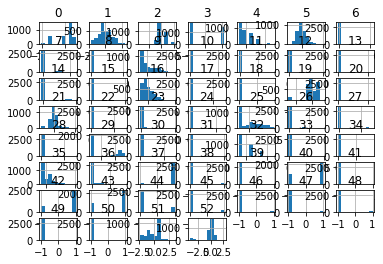

In [ ]:
# histograms of the variables
dataset = pd.DataFrame(x_train)
dataset.hist()
plt.show()

##Correlação

###Corelação Inicial 
OBS: Não rodar de novo para não perder a imagem

In [ ]:
#sb.set(font_scale=1.2,style="whitegrid") #set styling preferences

#loan = df.sample(frac = .25) #read the dataset and sample 25% of it
#loan.head(3)

In [ ]:
#Data Wrangling
#loan.replace([np.inf, -np.inf], np.nan) #convert infs to nans
#loan = loan.dropna(axis = 1, how = 'any') #remove nans
#loan = loan._get_numeric_data() #keep only numeric features

#loan.head(3)

In [ ]:
# Heatmap of correlation matrix
#corr = df.corr()
#data = [go.Heatmap( z=corr.corr().values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
#iplot(data, filename='pandas-heatmap')

###Corelação Inicial - Tentativa de reproduzir dados da 1º corelação

In [ ]:
#dfInicial = df[['SEXO',	'GRAUINSTRUCAO',	'IDADE',	'CEP_RESIDENCIA',	'ESTADO_CIVIL',	'DATA_ADMISSAO',	'JORNADA_MENSAL',	'LOTACAO',	'CARGO',	'DT_REFER',	'QTD_DEPENDENTES_IR',	'QTD_DEPENDENTES_SF',	'TABELA',	'PROCESSO_APOSENTADORIA',	
#                'NIVEL_EXPERIENCIA',	'VERBA_0998',	'VERBA_0997',	'VERBA_0996',	'VERBA_0699',	'VERBA_0606',	'VERBA_0099',	'VERBA_0183',	'VERBA_0698',	'VERBA_0983',	'VERBA_0980',	'VERBA_0163',	'VERBA_0107',	'VERBA_0607',	
#                'VERBA_0097',	'VERBA_0085',	'VERBA_0381',	'VERBA_0100',	'VERBA_0318',	'VERBA_0096',	'VERBA_0171', 'VERBA_0159',	'VERBA_0682',	'VERBA_0382',	'VERBA_0697',	'VERBA_0631',	'VERBA_0093',	'VERBA_0308',	'VERBA_0713',	
#                'VERBA_0206',	'VERBA_0170',	'VERBA_0271',	'VERBA_0231',	'VERBA_0133',	'VERBA_0174',	'VERBA_0180',	'VERBA_0116',	'VERBA_0122',	'VERBA_0326',	'VERBA_0001',	'VERBA_0004',	'VERBA_0005',	'VERBA_0007',	'VERBA_0008',	
#                'VERBA_0009',	'VERBA_0058',	'VERBA_0111',	'VERBA_0138',	'VERBA_0190',	'RACA',	'JORNADA_SEMANAL']]
#dfInicial.head(3)

In [ ]:
#sb.set(font_scale=1.7,style="whitegrid") #set styling preferences

#loan = dfInicial.sample(frac = .75) #read the dataset and sample 25% of it
#loan.head(3)

In [ ]:
#Data Wrangling
#loan.replace([np.inf, -np.inf], np.nan) #convert infs to nans
#loan = loan.dropna(axis = 1, how = 'any') #remove nans
#loan = loan._get_numeric_data() #keep only numeric features

#loan.head(3)

In [ ]:
# Heatmap of correlation matrix
#corr = dfInicial.corr()
#dfInicial = [go.Heatmap( z=corr.corr().values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
#iplot(dfInicial, filename='pandas-heatmap')

In [ ]:
#CORELAÇÃO MUITO FORTE = Váriaveis acima de + ou - 0.90
#quantidade = 0
#columns = np.full((corr.shape[0],), True, dtype=bool)
#for i in range(corr.shape[0]):
#    for j in range(i+1, corr.shape[0]):
#        if corr.iloc[i,j] >= 0.90 or corr.iloc[i,j] <= -0.90:
#          quantidade = quantidade + 1
#          print(quantidade, corr.columns[i],'/', corr.columns[j], '=', corr.iloc[i,j])

In [ ]:
#CORELAÇÃO FORTE
#quantidade = 0
#columns = np.full((corr.shape[0],), True, dtype=bool)
#for i in range(corr.shape[0]):
#    for j in range(i+1, corr.shape[0]):
#        if (corr.iloc[i,j] >= 0.70 and corr.iloc[i,j] < 0.90) or (corr.iloc[i,j] <= -0.70 and corr.iloc[i,j] > -0.90):
#          quantidade = quantidade + 1
#          print(quantidade, corr.columns[i],'/', corr.columns[j], '=', corr.iloc[i,j])

###Coleração Nova depois dosTratamentos

In [ ]:
# Heatmap of correlation matrix
corr = x_train_df.corr()
data = [go.Heatmap( z=corr.corr().values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

In [ ]:
#CORELAÇÃO MUITO FORTE = Váriaveis acima de + ou - 0.90
quantidade = 0
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.90 or corr.iloc[i,j] <= -0.90:
          quantidade = quantidade + 1
          print(quantidade, corr.columns[i],'/', corr.columns[j], '=', corr.iloc[i,j])


1 VERBA_0606 / VERBA_0699 = 0.9192020203405211
2 VERBA_0005 / VERBA_0133 = 0.9999999999994538
3 VERBA_0100 / VERBA_0698 = 0.9008962493377414
4 TABELA-AMC_AGEN_MUNI_FISC_TRAN / TABELA-PMF = -0.9116310429016615
5 TABELA-AMC_AGEN_MUNI_FISC_TRAN / VERBAS_PORCENTAGEM_100 = 0.9375992437604178


In [ ]:
#CORELAÇÃO FORTE
quantidade = 0
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if (corr.iloc[i,j] >= 0.70 and corr.iloc[i,j] < 0.90) or (corr.iloc[i,j] <= -0.70 and corr.iloc[i,j] > -0.90):
          quantidade = quantidade + 1
          print(quantidade, corr.columns[i],'/', corr.columns[j], '=', corr.iloc[i,j])

1 DATA_ADMISSAO / PARDA = -0.7566831239042363
2 VERBA_0606 / VERBA_0100 = 0.7166175721921075
3 VERBA_0606 / VERBA_0698 = 0.8435588143070601
4 VERBA_0180 / DIR_ASS_SUP_1 = 0.712486716892411
5 VERBA_0170 / TABELA-PMF = 0.7318395494495378
6 VERBA_0699 / VERBA_0698 = 0.7141967301016472
7 VERBA_0100 / TABELA-PMF = -0.784429293026234
8 VERBA_0100 / VERBAS_PORCENTAGEM_100 = 0.7530172931274054
9 TABELA-PMF / DIR_NIV_SUP_3 = 0.742868985249486
10 TABELA-PMF / VERBAS_PORCENTAGEM_100 = -0.8879522838115098
11 CASADO / SOLTEIRO = -0.7799581106921395


In [ ]:
corr.corr().head(3)

,GRAUINSTRUCAO,IDADE,DATA_ADMISSAO,JORNADA_MENSAL,QTD_DEPENDENTES_IR,VERBA_0606,VERBA_0308,VERBA_0163,VERBA_0713,VERBA_0099,VERBA_0180,VERBA_0697,VERBA_0005,VERBA_0190,VERBA_0170,VERBA_0133,VERBA_0699,VERBA_0009,VERBA_0174,VERBA_0100,VERBA_0107,VERBA_0698,VERBA_0004,VERBA_0980,VERBA_0381,VERBA_0183,VERBA_0607,VERBA_0271,VERBA_0008,VERBA_0171,VERBA_0631,VERBA_0007,VERBA_0116,VERBA_0983,VERBA_0382,VERBA_DESCONTO_FALTANTE,VERBA_PROVENTO_FALTANTE,TABELA-AMC_AGEN_MUNI_FISC_TRAN,TABELA-PMF,INDÍGENA,PARDA,BRANCA,MASCULINO,CASADO,SOLTEIRO,DIVORCIADO,UNIAO_ESTAVEL,DIR_NIV_SUP_3,DIR_NIV_SUP_2,DIR_ASS_SUP_1,AGENTE_ADMINISTRATIVO,NIVEL_EXPERIENCIA,VERBAS_PORCENTAGEM_100
GRAUINSTRUCAO,1.000000,0.080366,0.142437,0.170755,-0.113459,-0.066294,-0.127851,-0.009844,0.115616,-0.269784,-0.102073,-0.001501,-0.154846,0.025646,0.300723,-0.154846,0.011379,0.046034,-0.063574,-0.158471,-0.016366,-0.100533,-0.092558,-0.234617,-0.060543,-0.232212,-0.100765,-0.046799,0.078193,-0.256668,-0.015146,0.118595,-0.011860,-0.125220,-0.049587,-0.315587,-0.019246,-0.230011,0.256961,0.052623,0.061786,-0.052230,-0.277117,0.243481,-0.201126,-0.224300,0.065594,0.264138,0.282280,-0.119728,-0.036994,0.310215,-0.199626
IDADE,0.080366,1.000000,-0.576909,0.139209,0.137851,0.111035,0.278364,0.023954,0.171758,-0.007267,-0.048794,-0.056426,0.267627,-0.063280,0.197721,0.267627,0.185736,-0.047626,0.297974,0.056353,0.464790,0.107953,0.106111,-0.130023,0.044482,-0.226418,-0.034365,-0.092447,0.250854,-0.474228,0.046288,0.267797,-0.301169,-0.105632,-0.077763,0.040647,-0.102813,-0.225963,0.117334,-0.204608,0.835604,-0.225703,0.077258,0.195881,-0.216123,-0.069102,0.006874,0.109867,0.149316,-0.066761,0.425375,0.708226,-0.187959
DATA_ADMISSAO,0.142437,-0.576909,1.000000,-0.047789,-0.527352,-0.654221,-0.391560,-0.167715,-0.089290,-0.450861,0.205534,-0.006269,-0.241000,-0.036817,0.526888,-0.241000,-0.578976,-0.165871,-0.271833,-0.750224,-0.504553,-0.740246,-0.143649,0.078529,-0.045539,-0.294081,-0.012618,0.102272,-0.281498,0.340774,-0.048396,-0.221462,-0.213684,0.043521,0.037493,-0.426069,-0.121866,-0.503758,0.645244,0.104997,-0.716637,0.130764,-0.141968,-0.149059,0.163139,0.043114,0.013521,0.603823,0.539994,0.347954,-0.362833,-0.339185,-0.561072


#Fase 4 -Modelagem

GRAFICO COM O SALÁRIO -> HISTOGRAMA(DISTRIBUIÇÃO NORMAL)

In [ ]:
for i in y_train:
  if i > 8000:
    print(i)

8392.09
8369.66
8246.78
8580.1
8732.47
8304.92
8088.61
8318.08
8534.83
8896.18
9900.17


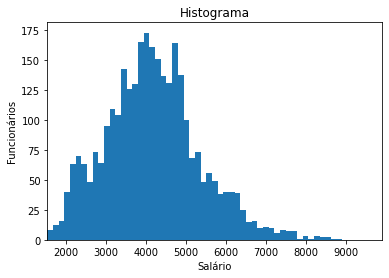

In [ ]:
import math
bins = np.linspace(math.ceil(min(y_train)), math.floor(max(y_train)), 60)

plt.xlim([min(y_train), max(y_train)])
plt.hist(y_train, bins=bins)
plt.title('Histograma')
plt.xlabel('Salário')
plt.ylabel('Funcionários')
plt.show()
plt.close()

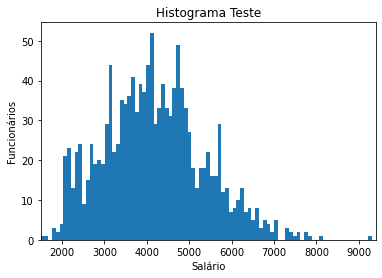

In [ ]:
import math
bins = np.linspace(math.ceil(min(y_test)), math.floor(max(y_test)), 90)

plt.xlim([min(y_test), max(y_test)])
plt.hist(y_test, bins=bins)
plt.title('Histograma Teste')
plt.xlabel('Salário')
plt.ylabel('Funcionários')
plt.show()
plt.close()

In [ ]:
def showPlot(y_test, Y_prev, textoTitulo):
  plt.scatter(y_test, Y_prev)
  range = [y_test.min(), max(Y_prev)]
  plt.plot(range, range, 'red')
  #plt.xlabel('Salário Real')
  #plt.ylabel('Salário Predito')
  plt.title(textoTitulo)
  plt.show()

In [ ]:
def showPlot2( XTeste, yTeste, XPoints, yPoints, XLine, yLine, textoTitulo):
    import matplotlib.pyplot as plt

    plt.scatter(XPoints, yPoints, color= 'violet')
    plt.scatter(XTeste, yTeste, color= 'blue')
    plt.scatter(XLine, yLine, color= 'red')
    plt.title(textoTitulo)
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_log_error

# Perda de regressão ao erro logarítmico quadrado médio(RMSE)
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

##Aplicando OLS

In [ ]:
#Transforma as colunas em numeros
listaOptNumerica = []
for i in range(0, len(x_train_df.columns)):
  listaOptNumerica.append(i)

len(listaOptNumerica)

53

In [ ]:
#Remove da lista um posição escolhida
def removerLitaOp(posicaoElemento, lista):
  temp = []
  for indice, dado in enumerate(lista):
    if(indice != posicaoElemento):
      temp.append(dado)
  return temp

###Execultando OLS

In [ ]:
#1- Execurção OLS
import statsmodels.api as sm
tamanhoBase = len(x_train_df)
X = np.append(arr = np.ones((tamanhoBase,1)).astype(int), values = x_train_df, axis=1)

X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     784.5
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22007.
No. Observations:                3066   AIC:                         4.412e+04
Df Residuals:                    3015   BIC:                         4.442e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.866e+14   6.92e+14      0.992      0.3

In [ ]:
#2- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(12, listaOptNumerica) #0,850
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     800.7
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22007.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3016   BIC:                         4.442e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.617e+14   6.65e+14      0.995      0.3

In [ ]:
#3- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(31, listaOptNumerica) #0,801
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     817.0
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22008.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3017   BIC:                         4.441e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.608e+14   6.66e+14      0.993      0.3

In [ ]:
#4- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(42, listaOptNumerica) #0,798
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     832.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22012.
No. Observations:                3066   AIC:                         4.412e+04
Df Residuals:                    3018   BIC:                         4.441e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.594e+14   6.66e+14      0.990      0.3

In [ ]:
#5- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(40, listaOptNumerica) #0,761
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     845.4
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22021.
No. Observations:                3066   AIC:                         4.414e+04
Df Residuals:                    3019   BIC:                         4.442e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.582e+14   6.68e+14      0.985      0.3

In [ ]:
#6- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(6, listaOptNumerica) #0,738
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     872.9
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22008.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3020   BIC:                         4.438e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.564e+14   7.65e+14      0.989      0.3

In [ ]:
#7- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(39, listaOptNumerica) #0,680
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     892.8
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22008.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3021   BIC:                         4.438e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.527e+14   7.65e+14      0.984      0.3

In [ ]:
#8- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(14, listaOptNumerica) #0,580
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     912.4
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22010.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3022   BIC:                         4.437e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.68e+14   6.93e+14      0.964      0.3

In [ ]:
#9- execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(31, listaOptNumerica) #0,537
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     935.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22008.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3023   BIC:                         4.436e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.712e+14   6.93e+14      0.968      0.3

In [ ]:
#10 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(29, listaOptNumerica) #0,541
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     957.9
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22010.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3024   BIC:                         4.436e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.611e+14   6.65e+14      0.994      0.3

In [ ]:
#11 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(2, listaOptNumerica) #0,350
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     980.3
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:                -22012.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3025   BIC:                         4.435e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.456e+14   6.65e+14      0.971      0.3

In [ ]:
#12 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(36, listaOptNumerica) #0,337
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1008.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22009.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3026   BIC:                         4.434e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.499e+14   6.64e+14      0.979      0.3

In [ ]:
#13 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(32, listaOptNumerica) #0,328
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1003.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22016.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3026   BIC:                         4.435e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.457e+14   6.66e+14      0.970      0.3

In [ ]:
#14 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(39, listaOptNumerica) #0,332
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1008.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22009.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3026   BIC:                         4.434e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7563.6231    557.582     13.565      0.0

In [ ]:
#15 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(35, listaOptNumerica) #0,298
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1035.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22010.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3027   BIC:                         4.433e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7510.4338    555.245     13.526      0.0

In [ ]:
#16 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(33, listaOptNumerica) #0,281
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1063.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22010.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3028   BIC:                         4.433e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7309.5514    523.030     13.975      0.0

In [ ]:
#17 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(31, listaOptNumerica) #0,405
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1092.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22010.
No. Observations:                3066   AIC:                         4.409e+04
Df Residuals:                    3029   BIC:                         4.432e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7310.4168    523.003     13.978      0.0

In [ ]:
#18 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(10, listaOptNumerica) #0,390
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22011.
No. Observations:                3066   AIC:                         4.409e+04
Df Residuals:                    3030   BIC:                         4.431e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7292.2028    522.551     13.955      0.0

In [ ]:
#19 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(20, listaOptNumerica) #0,189
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22012.
No. Observations:                3066   AIC:                         4.409e+04
Df Residuals:                    3031   BIC:                         4.430e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7310.5073    522.428     13.993      0.0

In [ ]:
#20 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(25, listaOptNumerica) #0,088
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1190.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22013.
No. Observations:                3066   AIC:                         4.409e+04
Df Residuals:                    3032   BIC:                         4.430e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7288.8097    522.439     13.951      0.0

In [ ]:
#21 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(19, listaOptNumerica) #0,074
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1227.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22015.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3033   BIC:                         4.429e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7213.8084    520.935     13.848      0.0

In [ ]:
#22 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(31, listaOptNumerica) #0,082
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1265.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22016.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3034   BIC:                         4.429e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6348.0036    154.774     41.015      0.0

In [ ]:
#23 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(16, listaOptNumerica) #0,075
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1306.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22018.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3035   BIC:                         4.428e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6341.0569    154.780     40.968      0.0

In [ ]:
#24 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(27, listaOptNumerica) #0,016
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1349.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22021.
No. Observations:                3066   AIC:                         4.410e+04
Df Residuals:                    3036   BIC:                         4.428e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6296.0317    153.776     40.943      0.0

In [ ]:
#25 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(9, listaOptNumerica) #0,012
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22024.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3037   BIC:                         4.428e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6135.0162    139.900     43.853      0.0

In [ ]:
#26 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(14, listaOptNumerica) #0,254
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1446.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22025.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3038   BIC:                         4.427e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6099.1856    136.335     44.737      0.0

In [ ]:
#27 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(10, listaOptNumerica) #0,052
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1500.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22027.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3039   BIC:                         4.427e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6291.3927     94.035     66.905      0.0

In [ ]:
#28 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(20, listaOptNumerica) #0,009
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1557.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22030.
No. Observations:                3066   AIC:                         4.411e+04
Df Residuals:                    3040   BIC:                         4.427e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6298.6968     94.083     66.948      0.0

In [ ]:
#29 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(9, listaOptNumerica) #0,006
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1618.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22034.
No. Observations:                3066   AIC:                         4.412e+04
Df Residuals:                    3041   BIC:                         4.427e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6307.8660     94.123     67.018      0.0

In [ ]:
#30 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(10, listaOptNumerica) #0,007
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1684.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:25   Log-Likelihood:                -22038.
No. Observations:                3066   AIC:                         4.412e+04
Df Residuals:                    3042   BIC:                         4.427e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6340.7480     93.442     67.858      0.0

In [ ]:
#31 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(20, listaOptNumerica) #0,002
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1756.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:26   Log-Likelihood:                -22042.
No. Observations:                3066   AIC:                         4.413e+04
Df Residuals:                    3043   BIC:                         4.427e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6492.1751     80.038     81.114      0.0

In [ ]:
#32 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(16, listaOptNumerica) #0,001
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1833.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:26   Log-Likelihood:                -22048.
No. Observations:                3066   AIC:                         4.414e+04
Df Residuals:                    3044   BIC:                         4.427e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6513.8236     79.870     81.556      0.0

In [ ]:
#33 execurções exclui um e roda novamente
listaOptNumerica = removerLitaOp(12, listaOptNumerica) #0,004
X_opt = X[:,listaOptNumerica]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:18:26   Log-Likelihood:                -22052.
No. Observations:                3066   AIC:                         4.415e+04
Df Residuals:                    3045   BIC:                         4.427e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6542.2257     79.350     82.448      0.0

###Resultado das features reduzidas com OLS

In [ ]:
print('Quantidade de atributos',len(listaOptNumerica))

Quantidade de atributos 21


In [ ]:
#Pegando a descrição das colunas selecionadas
colunasEscolhidas = []
for index, coluna in enumerate(x_train_df.columns):
  for indexColunaEscolhida in listaOptNumerica:
    if(index == indexColunaEscolhida):
      colunasEscolhidas.append(coluna)

print(colunasEscolhidas)

['GRAUINSTRUCAO', 'IDADE', 'JORNADA_MENSAL', 'QTD_DEPENDENTES_IR', 'VERBA_0606', 'VERBA_0163', 'VERBA_0713', 'VERBA_0099', 'VERBA_0180', 'VERBA_0009', 'VERBA_0100', 'VERBA_0004', 'VERBA_0607', 'VERBA_0271', 'VERBA_0008', 'VERBA_0631', 'VERBA_PROVENTO_FALTANTE', 'TABELA-AMC_AGEN_MUNI_FISC_TRAN', 'DIR_NIV_SUP_2', 'DIR_ASS_SUP_1', 'VERBAS_PORCENTAGEM_100']


In [ ]:
x_train = x_train_df[colunasEscolhidas]
x_test = x_teste_df[colunasEscolhidas]

##4.1 Regressão Linear Multivariaveis

In [ ]:
#Aplicando o modelo de Regressão linear Simples
regressionLM = linear_model.LinearRegression() # normalize=True

#Treinamos o modelo usando os dados de treinamento
regressionLM.fit(x_train, y_train)

#Predizendos os valores
y_pred_LM = regressionLM.predict(x_test)

In [ ]:
#Predição está dano negativa
y_pred_LM_novo = []
for i in y_pred_LM:
  if i <= 0 :
    y_pred_LM_novo.append(0)
    print(i)
  else:
    y_pred_LM_novo.append(i)

#y_pred_LM = y_pred_LM_novo

In [ ]:
#Arredondar para duas casas decimais R$
y_pred_LM_formatado = []
for i in y_pred_LM:
  y_pred_LM_formatado.append(round(i, 2))

In [ ]:
# Perda de regressão ao erro logarítmico quadrado médio
e_LM = rmsle(y_test, y_pred_LM_formatado)

# variância
#variancia_LM = regressionLM.score(x_test, y_test)
variancia_LM = explained_variance_score(y_test, y_pred_LM_formatado)

# Valor de R2 perto de 1 nos diz que é um bom modelo
r2_LM = r2_score(y_test, y_pred_LM_formatado)

print('4.2 Regressão Liner Multivariaveis', ' | ', e_LM, '            | ', variancia_LM*100, '    | ', r2_LM*100)

4.2 Regressão Liner Multivariaveis  |  0.12286768317307485             |  83.4482974157438     |  83.4440168664233


obs - > graficos overfat

In [ ]:
tabela_dados = pd.DataFrame({'Atual': y_test.flatten(), 'Predição': y_pred_LM})
tabela_dados

,Atual,Predição
0,2203.45,2237.489316
1,7558.60,7374.401626
2,2654.89,3284.608153
3,6912.72,6437.275058
4,3806.30,4226.030727
...,...,...
1309,5676.47,5949.193468
1310,4035.59,4011.396905
1311,5315.72,4848.655000
1312,5655.22,4904.751464


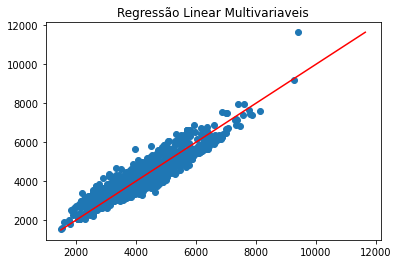

In [ ]:
showPlot(y_test, y_pred_LM, "Regressão Linear Multivariaveis")

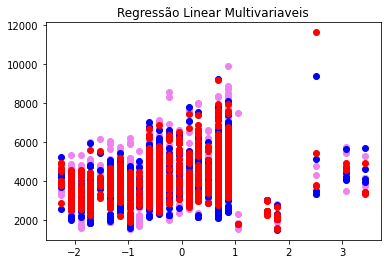

In [ ]:
#showPlot2(x_test['PC1'], y_test, x_train['PC1'], y_train, x_test['PC1'], y_pred_LM, "Regressão Linear Multivariaveis")#NIVEL_EXPERIENCIA
showPlot2(x_teste_df['NIVEL_EXPERIENCIA'], y_test, x_train_df['NIVEL_EXPERIENCIA'], y_train, x_teste_df['NIVEL_EXPERIENCIA'], y_pred_LM, "Regressão Linear Multivariaveis")#NIVEL_EXPERIENCIA

##4.2 SVR - Regressão Vetorial de Suporte

In [ ]:
#Aplicando o modelo
regressionSVR = SVR(kernel='linear')

#Treinamos o modelo usando os dados de treinamento
regressionSVR.fit(x_train, y_train)

#Predizendos os valores
y_pred_SVR = regressionSVR.predict(x_test)

In [ ]:
#Arredondar para duas casas decimais R$
y_pred_SVR_formatado = []
for i in y_pred_SVR:
  y_pred_SVR_formatado.append(round(i, 2))

In [ ]:
# Perda de regressão ao erro logarítmico quadrado médio
e_SVR = rmsle(y_test, y_pred_SVR_formatado)

# variância
variancia_SVR = explained_variance_score(y_test, y_pred_SVR_formatado)

# Valor de R2 perto de 1 nos diz que é um bom modelo
r2_SVR = r2_score(y_test, y_pred_SVR_formatado)

print('4.2 Regressão Vetorial de Suporte', ' | ', e_SVR, '            | ', variancia_SVR*100, '    | ', r2_SVR*100)

4.2 Regressão Vetorial de Suporte  |  0.14653293209096965             |  77.29092100639919     |  77.273365018231


##4.3 Aplicando Regressão com Random Forest

n_jobs = Número de tarefas a serem execultadas em paraleto, 1significa usar todos os processadores

In [ ]:
mdl = RandomForestRegressor(max_depth = 20, n_estimators=100, n_jobs=-1, bootstrap=True)
probs = mdl.fit(x_train, y_train)

y_pred_RF = mdl.predict(x_test)

In [ ]:
#Arredondar para duas casas decimais R$
y_pred_RF_formatado = []
for i in y_pred_RF:
  y_pred_RF_formatado.append(round(i, 2))

In [ ]:
# Perda de regressão ao erro logarítmico quadrado médio
e_RF = rmsle(y_test, y_pred_RF_formatado)

# variância
variancia_RF = explained_variance_score(y_test, y_pred_RF_formatado)

# Valor de R2 perto de 1 nos diz que é um bom modelo
r2_RF = r2_score(y_test, y_pred_RF_formatado)

print('4.3 Predição com Random Forest  100  ', ' | ', e_RF, '             | ', variancia_RF*100, '     | ', r2_RF*100)

4.3 Predição com Random Forest  100    |  0.09450211334208146              |  90.03234413685018      |  90.03123613463383


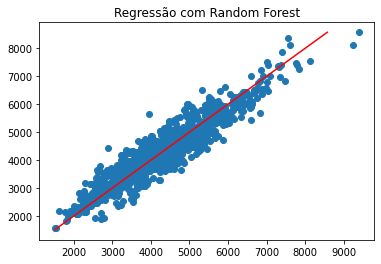

In [ ]:
showPlot(y_test, y_pred_RF, "Regressão com Random Forest")

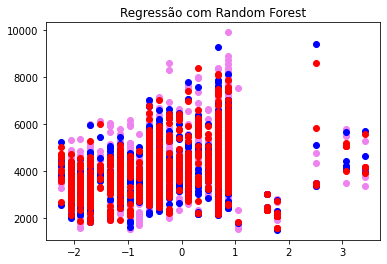

In [ ]:
#showPlot2(x_test['PC1'], y_test, x_train['PC1'], y_train, x_test['PC1'], y_pred_RF, "Regressão com Random Forest")
showPlot2(x_teste_df['NIVEL_EXPERIENCIA'], y_test, x_train_df['NIVEL_EXPERIENCIA'], y_train, x_teste_df['NIVEL_EXPERIENCIA'], y_pred_RF, "Regressão com Random Forest")

##4.4 Tentativa de Predição com GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge

params = {'alpha': np.linspace(0.1,1,200), 'random_state':[2020]}

model1 = GridSearchCV(estimator = Ridge(), param_grid = params)
model1 = model1.fit(x_train, y_train)

y_pred_CV = model1.predict(x_test)

In [ ]:
model1.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=2020, solver='auto', tol=0.001)

In [ ]:
#Predição está dano negativa
y_pred_CV_novo = []
for i in y_pred_CV:
  if i < 0 :
    y_pred_CV_novo.append(0)
    print(i)
  else:
    y_pred_CV_novo.append(i)

#y_pred_CV = y_pred_CV_novo

In [ ]:
# erro logarítmico quadrado médio
e_CV = rmsle(y_test, y_pred_CV)

# variância
variancia_CV = model1.score(x_test, y_test)

# Valor de R2 perto de 1 nos diz que é um bom modelo
r2_CV = r2_score(y_test, y_pred_CV)

print('4.4 Predição com GridSearchCV     ', ' | ', e_CV, '             | ', variancia_CV*100, '    | ', r2_CV*100)

4.4 Predição com GridSearchCV       |  0.1228847603467898              |  83.44428983440544     |  83.44428983440544


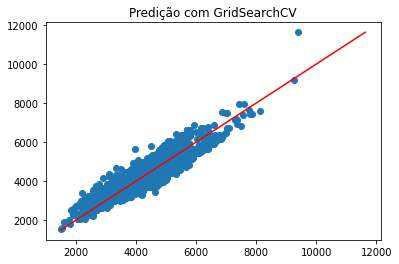

In [ ]:
showPlot(y_test, y_pred_CV, "Predição com GridSearchCV")

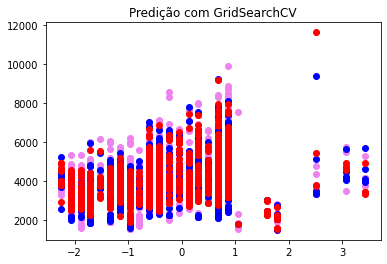

In [ ]:
#showPlot2(x_test['PC1'], y_test, x_train['PC1'], y_train, x_test['PC1'], y_pred_CV, "Predição com GridSearchCV")
showPlot2(x_teste_df['NIVEL_EXPERIENCIA'], y_test, x_train_df['NIVEL_EXPERIENCIA'], y_train, x_teste_df['NIVEL_EXPERIENCIA'], y_pred_CV, "Predição com GridSearchCV")

In [ ]:
tabela_dados = pd.DataFrame({'Atual': y_test.flatten(), 'Predição': y_pred_CV.flatten()})
tabela_dados

,Atual,Predição
0,2203.45,2237.297597
1,7558.60,7371.701755
2,2654.89,3285.802098
3,6912.72,6436.010204
4,3806.30,4226.292196
...,...,...
1309,5676.47,5950.381398
1310,4035.59,4010.986287
1311,5315.72,4848.849735
1312,5655.22,4903.993283


##Resultados

In [ ]:
print('Técnica                             | Erro logarítmico quadrado médio  |  Variancia             | R2')
print('4.1 Regressão Linear Multivariaveis', ' | ', e_LM*100, '           | ', variancia_LM*100, '    | ', r2_LM*100)
print('4.2 Regressão Vetorial de Suporte', ' | ', e_SVR*100, '             | ', variancia_SVR*100, '    | ', r2_SVR*100)
print('4.3 Predição com Random Forest    ', ' | ', e_RF*100, '             | ', variancia_RF*100, '    | ', r2_RF*100)
#print('4.4 Predição com GridSearchCV     ', ' | ', e_CV, '             | ', variancia_CV*100, '    | ', r2_CV*100)

Técnica                             | Erro logarítmico quadrado médio  |  Variancia             | R2
4.1 Regressão Linear Multivariaveis  |  12.286768317307486            |  83.4482974157438     |  83.4440168664233
4.2 Regressão Vetorial de Suporte  |  14.653293209096965              |  77.29092100639919     |  77.273365018231
4.3 Predição com Random Forest      |  9.450211334208145              |  90.03234413685018     |  90.03123613463383


TEORIA DOS GRANDES NUMEROS

#5 avaliação dos modelos

In [ ]:
#JUNTA BASE DE TESTE E TREINAMENTO PARA O CROSS VALIDATION
x_data = []
for dado in x_train.values:
  x_data.append(dado)

for dado in x_test.values:
  x_data.append(dado)

len(x_data)

4380

In [ ]:
y_data = [] 
for dado in y_train:
  y_data.append(dado)

for dado in y_test:
  y_data.append(dado)

len(y_data)

4380

###Avaliação dos Resultados Linear Multivariáveis

In [ ]:
ini = time.time()
from sklearn.model_selection import cross_validate
regressionLM = linear_model.LinearRegression()
scoresLM = cross_validate(regressionLM, x_data, y_data, cv=10,
                         scoring=('r2', 'neg_mean_squared_error', 'explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 
                                  'neg_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'),
                         return_train_score=True)
fim = time.time()
print("Tempo Gasto: ", fim-ini)

Tempo Gasto:  0.2571582794189453


In [ ]:
print('Media Score: ', scoresLM['test_r2'].mean()*100)
print(scoresLM['test_explained_variance'].mean()*100)
print(np.sqrt(scoresLM['test_neg_root_mean_squared_error'].mean() * -1))

Media Score:  83.63245714547193
83.72390050438516
21.887759475576733


###Avaliação dos Resultados Vetorial Suporte

In [ ]:
ini = time.time()
#from sklearn.model_selection import cross_validate
regressionSVR = SVR(kernel='linear')
scoresRV = cross_validate(regressionSVR, x_data, y_data, cv=10,
                         scoring=('r2', 'neg_mean_squared_error', 'explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 
                                  'neg_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'),
                         return_train_score=True)
fim = time.time()
print("Tempo Gasto: ", fim-ini)

Tempo Gasto:  13.299707412719727


In [ ]:
print('Media Score: ', scoresRV['test_r2'].mean()*100)
print(scoresRV['test_explained_variance'].mean()*100)
print(np.sqrt(scoresRV['test_neg_root_mean_squared_error'].mean() * -1))

Media Score:  79.16444618057031
79.29100455517191
23.256612120892804


###Avaliação dos Resultados Randow Forest

In [ ]:
ini = time.time()
mdl = RandomForestRegressor(max_depth = 20, n_estimators=100, n_jobs=-1, bootstrap=True)
scores = cross_validate(mdl, x_data, y_data, cv=10,
                         scoring=('r2', 'neg_mean_squared_error', 'explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 
                                  'neg_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'),
                         return_train_score=True)
fim = time.time()
print("Tempo Gasto: ", fim-ini)

Tempo Gasto:  17.162511825561523


In [ ]:
print('Media Score: ', scores['test_r2'].mean()*100)
print(scores['test_explained_variance'].mean()*100)
print(np.sqrt(scores['test_neg_root_mean_squared_error'].mean() * -1))

#print('Media Score: ', scores['train_r2'].mean()*100)
#print(scores['train_explained_variance'].mean()*100)
#print(scores['train_neg_root_mean_squared_error'].mean())

#print(scores['test_neg_mean_squared_error'].mean()*100)
#print(scores['test_explained_variance'].mean()*100)
#print(scores['test_max_error'].mean()*100)
#print(scores['test_neg_mean_absolute_error'].mean()*100)
#print(scores['test_neg_root_mean_squared_error'].mean()*100)
#print(scores['test_neg_mean_squared_log_error'].mean()*100)
#print(scores['test_neg_mean_poisson_deviance'].mean()*100)
#print(scores['test_neg_mean_gamma_deviance'].mean()*100)

Media Score:  90.62989879126762
90.67992821546746
19.047062239800706


In [ ]:
scores['test_neg_root_mean_squared_error']

array([-361.05056974, -358.7952873 , -352.00869337, -350.02877614,
       -373.46047871, -361.16530342, -364.11488773, -353.72783672,
       -326.63050173, -426.92346481])

##Validação Cruzada - Monte Carlo

In [ ]:
def calcularMedia(lst): 
    return sum(lst) / len(lst) 

In [ ]:
def calcularRaiz(lista):
  listaNova = []
  for i in lista:
    listaNova.append(np.sqrt(i * -1))
  return listaNova

###Avaliação dos Resultados Linear Multivariáveis

In [ ]:
qtd_cv = 100
import statistics

In [ ]:
ini = time.time()
regressionLM = linear_model.LinearRegression()
monte_carlo_lm = cross_val_score(regressionLM, x_data, y_data, cv=qtd_cv, scoring=('r2'))
fim = time.time()
print("Tempo Gasto: ", fim-ini)
print(monte_carlo_lm)
print(monte_carlo_lm.mean() * 100)
print(statistics.stdev(monte_carlo_lm) * 100)

Tempo Gasto:  1.0614216327667236
[0.807332   0.8252943  0.78495135 0.79167345 0.81369002 0.86329845
 0.81873387 0.85396375 0.86787999 0.81809257 0.83314865 0.90158319
 0.86597677 0.84814974 0.86416218 0.87622116 0.85419752 0.85447015
 0.85991739 0.86159946 0.89587833 0.8962036  0.83342533 0.82881406
 0.90432132 0.82170764 0.85532007 0.8535522  0.81347437 0.78071012
 0.79402745 0.83855292 0.71941496 0.80997401 0.83860417 0.84531732
 0.73460748 0.78061879 0.84092703 0.79845181 0.86645898 0.77226383
 0.87789155 0.84488413 0.75560879 0.6833632  0.75258676 0.82320627
 0.8319324  0.71779704 0.80122041 0.89155454 0.83950644 0.85657039
 0.8574189  0.82106581 0.84687745 0.76004624 0.83003276 0.83349806
 0.87006155 0.85903137 0.82360463 0.74068168 0.83461694 0.74202838
 0.85647715 0.81412804 0.86176023 0.86681172 0.85474209 0.87547631
 0.84797639 0.81390568 0.79225311 0.84221672 0.84816076 0.85208773
 0.8794188  0.6883885  0.82620028 0.81207686 0.80638925 0.80657514
 0.84906939 0.7503998  0.9126

In [ ]:
monte_carlo_lm = cross_val_score(regressionLM, x_data, y_data, cv=qtd_cv, scoring=('explained_variance'))
print(monte_carlo_lm)
print(monte_carlo_lm.mean() * 100)
print(statistics.stdev(monte_carlo_lm) * 100)

[0.80848808 0.84431718 0.78517426 0.79249033 0.81399109 0.86354451
 0.81883562 0.85978239 0.86807498 0.81814455 0.8351984  0.90214558
 0.86677212 0.84860737 0.86590523 0.87887424 0.85478299 0.86377705
 0.86931451 0.86170738 0.89651472 0.89725984 0.84340541 0.84091545
 0.90856273 0.83118117 0.86195476 0.85814305 0.81814444 0.78251547
 0.80326994 0.84873031 0.73425505 0.81872552 0.84447542 0.84534854
 0.74466832 0.78621127 0.84339157 0.80717735 0.86700104 0.77240746
 0.88753608 0.86972412 0.75934051 0.68577112 0.75369099 0.83063539
 0.83336024 0.76273492 0.80987773 0.89167796 0.84251208 0.85677541
 0.85742838 0.825456   0.86810495 0.76719639 0.83363825 0.83662389
 0.87320535 0.85909227 0.8238725  0.74672238 0.85049474 0.74203961
 0.8565699  0.81913928 0.86245383 0.86717363 0.87092133 0.88107358
 0.84824034 0.81433205 0.79502642 0.8468286  0.84817705 0.85219672
 0.88034603 0.69015373 0.82643689 0.812775   0.80725991 0.81744644
 0.85657257 0.76713801 0.91343823 0.82447236 0.79137845 0.7802

In [ ]:
monte_carlo_lm = cross_val_score(regressionLM, x_data, y_data, cv=qtd_cv, scoring=('neg_root_mean_squared_error'))
monte_carlo_lm = calcularRaiz(monte_carlo_lm)
print(monte_carlo_lm)
print(calcularMedia(monte_carlo_lm))
print(statistics.stdev(monte_carlo_lm) * 100)

[21.037140629577376, 21.402537850625283, 22.772640828076614, 22.31088899480718, 22.37315203735489, 21.213983225156028, 22.41566194463677, 22.064225021252724, 21.76650033369641, 22.203644057378785, 21.18768790582236, 19.073391977241766, 21.815610294582758, 21.18092407306798, 21.681423416656678, 21.446329082187322, 19.458359521090067, 21.774130241996936, 20.829630528328966, 21.160660485224533, 22.288159229209437, 21.885828236919444, 20.87126453641857, 22.60740530963832, 20.478786393007468, 24.080758814546964, 21.724433806726065, 20.598468444050937, 21.172599061564583, 21.606670584708713, 23.63879442471382, 21.73533356030557, 21.703436897964465, 21.153332314608605, 21.427835172490624, 20.993095873133917, 22.92355303477104, 21.255209908296273, 22.263859421206327, 22.855705578287328, 22.082787831815686, 22.405484027442817, 20.438727187079916, 23.208236964880314, 22.408768070381004, 23.63427592812689, 23.479767984846987, 21.62275430994006, 21.581277213220986, 22.994766115789123, 22.649108828

###Avaliação dos Resultados Vetorial Suporte

In [ ]:
regressionSVR = SVR(kernel='linear')
monte_carlo_svr = cross_val_score(regressionSVR, x_data, y_data, cv=qtd_cv, scoring=('r2'))
print(monte_carlo_svr)
print(monte_carlo_svr.mean() * 100)
print(statistics.stdev(monte_carlo_svr) * 100)

[0.75582312 0.78854184 0.76156195 0.7681201  0.75786145 0.7961727
 0.75171431 0.78477373 0.83153403 0.75590125 0.79015408 0.89288107
 0.81849836 0.81604297 0.81147506 0.85169835 0.78956937 0.8195512
 0.80669917 0.84037111 0.87312779 0.89470797 0.77586397 0.73885551
 0.89630556 0.77881066 0.80001353 0.83014826 0.77935685 0.73466335
 0.74108136 0.8325585  0.71271778 0.79243516 0.82767594 0.80924415
 0.70474254 0.76131273 0.79449046 0.6987732  0.81556694 0.69737623
 0.85564068 0.78668931 0.71472119 0.63109668 0.76631176 0.75150971
 0.76963893 0.69632513 0.77525579 0.84929551 0.84130869 0.77831262
 0.78612539 0.76268687 0.82038622 0.72902758 0.80004043 0.77554332
 0.83405849 0.81538106 0.7876394  0.64592374 0.7929068  0.68062568
 0.82657011 0.81629188 0.85834455 0.80484514 0.81365723 0.79430916
 0.84548731 0.73626875 0.7308663  0.81051026 0.81893578 0.82071938
 0.83818175 0.75698225 0.77987913 0.85511688 0.7616199  0.75384023
 0.75232855 0.71900721 0.8622132  0.74049057 0.71740007 0.700992

In [ ]:
monte_carlo_svr = cross_val_score(regressionSVR, x_data, y_data, cv=qtd_cv, scoring=('explained_variance'))
print(monte_carlo_svr)
print(monte_carlo_svr.mean() * 100)
print(statistics.stdev(monte_carlo_svr * 100))

[0.75838242 0.80456698 0.76219138 0.76816786 0.75788723 0.79653309
 0.75211613 0.79134773 0.83153548 0.75628345 0.80359274 0.89392642
 0.82565303 0.81902463 0.81468914 0.85739892 0.79549342 0.82339238
 0.82185255 0.84051172 0.87342954 0.89542813 0.78061401 0.74681265
 0.90382928 0.78802556 0.8009901  0.84173504 0.78701686 0.74327974
 0.75272052 0.84267406 0.71612527 0.80773707 0.83800303 0.81104632
 0.72001185 0.77478804 0.79754121 0.71220714 0.8156387  0.697395
 0.86743567 0.80883976 0.72088202 0.63160191 0.77179342 0.76095442
 0.77537766 0.73644719 0.77688738 0.84930122 0.84134012 0.77951965
 0.78617764 0.76703777 0.84574528 0.7397475  0.80620275 0.77839117
 0.83446487 0.81551414 0.78868959 0.66805383 0.80072938 0.68623679
 0.82815729 0.81805228 0.85950638 0.8048452  0.83010727 0.80163157
 0.8472383  0.73664952 0.73336401 0.81073874 0.81948143 0.82079544
 0.84408904 0.75983471 0.78024345 0.86062321 0.76362339 0.76670285
 0.77766592 0.73656222 0.86242345 0.74401987 0.7293179  0.707079

In [ ]:
monte_carlo_svr = cross_val_score(regressionSVR, x_data, y_data, cv=qtd_cv, scoring=('neg_root_mean_squared_error'))
monte_carlo_svr = calcularRaiz(monte_carlo_svr)
print(monte_carlo_svr)
print(calcularMedia(monte_carlo_svr))
print(statistics.stdev(monte_carlo_svr * 100))

[22.320835606723563, 22.448876887113812, 23.368084271893046, 22.91640559737154, 23.888238760170598, 23.441988292758044, 24.24992093317089, 24.310692502700565, 23.12994008745602, 23.897530947501682, 22.43759315852071, 19.481713891179282, 23.533823240199368, 22.221333579606164, 23.532865809735064, 22.437675291659012, 21.32761204910508, 22.976892847273106, 22.575840915592888, 21.929192929926405, 23.41696203476559, 21.964245047966372, 22.47886810520131, 25.124875126938875, 20.894851283920893, 25.414292977219617, 23.555729119881622, 21.376259536698218, 22.080665520275875, 22.661179759219504, 25.03017099546454, 21.934338141732013, 21.831801373796807, 21.62539209772699, 21.781696432072184, 22.12256788499839, 23.54290125157612, 21.70815216371195, 23.736099418149283, 25.27105124405, 23.939215732916356, 24.055926352637275, 21.31221695583678, 25.13224283508081, 23.29238518584632, 24.55444349231951, 23.147136911629254, 23.543534062852974, 23.351157700237543, 23.42021181593532, 23.35502311194127, 2

###Avaliação dos Resultados Randow Forest

In [ ]:
mdl = RandomForestRegressor(max_depth = 20, n_estimators=100, n_jobs=-1, bootstrap=True)
monte_carlo_rf = cross_val_score(mdl, x_data, y_data, cv=qtd_cv, scoring=('r2'))
print(monte_carlo_rf)
print(monte_carlo_rf.mean() * 100)
print(statistics.stdev(monte_carlo_rf * 100))

[0.9101298  0.8984929  0.88305837 0.91269109 0.89922755 0.91279064
 0.81876367 0.94175644 0.88935428 0.95990212 0.89979416 0.96072911
 0.8900962  0.89688455 0.89048432 0.92513415 0.94348472 0.84560926
 0.92003433 0.95518816 0.93283534 0.93673781 0.88408947 0.92638084
 0.93730285 0.90863401 0.92449937 0.91322649 0.94239744 0.91373853
 0.90970642 0.87932045 0.83092548 0.91345822 0.89488744 0.9021182
 0.88748026 0.87734219 0.9289997  0.92450995 0.94603402 0.9184679
 0.92503133 0.90862244 0.87474883 0.8685603  0.89327923 0.89426472
 0.90546364 0.83569849 0.8983976  0.94812539 0.90326088 0.93027329
 0.9311386  0.89120321 0.87868356 0.89647513 0.8795518  0.90069317
 0.92239482 0.949455   0.91224279 0.85517428 0.87643536 0.86467092
 0.9354356  0.91078672 0.84564759 0.9284645  0.90011462 0.93193568
 0.9458029  0.85215776 0.85419612 0.90314069 0.90952693 0.93205799
 0.90164304 0.8688649  0.91969561 0.89513272 0.92475933 0.89212728
 0.92237344 0.94066457 0.92372411 0.93393443 0.89339685 0.918385

In [ ]:
monte_carlo_rf = cross_val_score(mdl, x_data, y_data, cv=qtd_cv, scoring=('explained_variance'))
print(monte_carlo_rf)
print(monte_carlo_rf.mean() * 100)
print(statistics.stdev(monte_carlo_rf * 100))

[0.91939425 0.90392484 0.87522603 0.90462639 0.89770304 0.91096346
 0.82769924 0.95299382 0.89111035 0.96065905 0.89853994 0.95764663
 0.89423824 0.89673068 0.89291316 0.9313866  0.93522895 0.85870538
 0.91487381 0.95497685 0.94551289 0.93855798 0.89127453 0.92451468
 0.93866448 0.91448949 0.92506646 0.92515673 0.94382778 0.93146253
 0.91660561 0.8927922  0.83827291 0.90992379 0.89343073 0.91052173
 0.89403139 0.87928846 0.93052097 0.93611726 0.94667993 0.92228975
 0.92337689 0.91186291 0.88819382 0.86942399 0.89546865 0.91561851
 0.90229674 0.83938698 0.8998768  0.95085368 0.91642921 0.93583364
 0.93216854 0.89701236 0.89126506 0.89597668 0.87730411 0.89943756
 0.92876659 0.9529023  0.90051498 0.85915159 0.87684043 0.85323638
 0.93627826 0.92314162 0.84934733 0.92954705 0.90440412 0.9395025
 0.94157895 0.86085626 0.85352751 0.90478009 0.90869908 0.92591347
 0.90004778 0.88052459 0.92738991 0.89322986 0.91716295 0.89917602
 0.9341558  0.94572832 0.92420352 0.93324758 0.90228161 0.92730

In [ ]:
monte_carlo_rf = cross_val_score(mdl, x_data, y_data, cv=qtd_cv, scoring=('neg_root_mean_squared_error'))
monte_carlo_rf = calcularRaiz(monte_carlo_rf)
print(monte_carlo_rf)
print(calcularMedia(monte_carlo_rf))
print(statistics.stdev(monte_carlo_rf * 100))

[17.53997827020665, 18.675890505173246, 20.08758467744679, 18.01634096946764, 19.399036660883265, 18.687234682608917, 22.804470785488046, 17.98145010298672, 20.72340726107989, 15.058010778433827, 18.396728379651833, 15.265557616325045, 20.627512412575378, 19.07514224016749, 20.600415372892734, 18.47982615166567, 15.888355553286779, 21.767088221642247, 18.038390537765565, 15.600293151544527, 19.805993674392035, 19.13183940842498, 18.765091062222776, 18.43182191160617, 18.361242347086563, 20.692066282471213, 18.80321499774903, 18.34294104183687, 15.310983763399376, 17.061761402191795, 19.177010166123207, 20.45419531884081, 19.107607343427773, 17.293024057151637, 19.524146376861356, 18.373366717003634, 18.35621376689369, 18.08892488784113, 18.060080627009935, 17.87402664903561, 17.095528734680368, 16.816565580552012, 18.43048928644059, 20.750733807373443, 18.418663861809705, 19.05726642269815, 18.868038173870307, 19.22813259038676, 18.55476641809383, 20.31733790393714, 19.01229200768173, 

#índice classificatório

In [ ]:
base = pd.DataFrame({ 'Y_TEST': y_test.flatten(), 'Y_PRED': y_pred_RF.flatten()}) #Base para juntar o valor real com o valor predito na lista não usada nos modelos
baseEscalonada = x_test #41 features geradas pela OLS
eps = 19

In [ ]:
class Anomalia(object):  
    def __init__(self, indice, salario, salario_predicao, diferenca, referencia, porcentagem):  
        self.indice = indice  
        self.salario = salario 
        self.salario_predicao = salario_predicao
        self.diferenca = diferenca
        self.referencia = referencia
        self.porcentagem = porcentagem

    def getDiferenca(self):
        return float(self.diferenca)

In [ ]:
#Lista Final para passar para os analistas fiscais
#usar esse cara  -> y_test_completa
listaIndiceSalario = []
for indice, dado in enumerate(base.values):
  salario = dado[0]
  predicao = round(dado[1], 2)
  diferenca = round(salario - predicao, 2)
  referencia = False 
  porcentagem = round((diferenca * 100) / salario, 2)
  if(diferenca > 0):
      referencia = True
  else:
      porcentagem = porcentagem * (-1)
  listaIndiceSalario.append(Anomalia(indice, salario, predicao, abs(diferenca), referencia, porcentagem))

#Ordenando a lista da maior diferença, podendo ser positivo ou negativo
listaIndiceSalario = sorted(listaIndiceSalario, key = Anomalia.getDiferenca, reverse=True)

#Exibir a lista
print('Id & Indice & Salário & Predição & Diferença & Porcentagem & Positivo')
for indice, obj in enumerate(listaIndiceSalario): 
    print( indice+1, obj.indice, obj.salario, obj.salario_predicao, obj.diferenca, obj.porcentagem, obj.referencia, sep =' & ' ) 

Id & Indice & Salário & Predição & Diferença & Porcentagem & Positivo
1 & 1290 & 3961.66 & 5667.95 & 1706.29 & 43.07 & False
2 & 1117 & 2894.45 & 4436.57 & 1542.12 & 53.28 & False
3 & 1072 & 5337.48 & 6523.23 & 1185.75 & 22.22 & False
4 & 1214 & 6606.1 & 5423.75 & 1182.35 & 17.9 & True
5 & 997 & 6838.21 & 5681.63 & 1156.58 & 16.91 & True
6 & 1058 & 9252.96 & 8103.23 & 1149.73 & 12.43 & True
7 & 943 & 5865.63 & 4719.48 & 1146.15 & 19.54 & True
8 & 306 & 4769.89 & 3662.65 & 1107.24 & 23.21 & True
9 & 938 & 2688.78 & 3784.75 & 1095.97 & 40.76 & False
10 & 1289 & 4924.69 & 6000.04 & 1075.35 & 21.84 & False
11 & 815 & 5462.93 & 4414.84 & 1048.09 & 19.19 & True
12 & 1199 & 2614.98 & 3657.54 & 1042.56 & 39.87 & False
13 & 966 & 4973.98 & 6006.74 & 1032.76 & 20.76 & False
14 & 516 & 3529.37 & 2508.17 & 1021.2 & 28.93 & True
15 & 70 & 3674.07 & 4692.6 & 1018.53 & 27.72 & False
16 & 987 & 3348.79 & 4351.46 & 1002.67 & 29.94 & False
17 & 584 & 4871.88 & 3887.82 & 984.06 & 20.2 & True
18 & 177 & 4